In [1]:
# importar bibliotecas
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs, make_moons, make_circles  # Importar funções para gerar datasets
from sklearn.decomposition import PCA  # Importar PCA

import seaborn as sns
from sklearn.decomposition import PCA


import matplotlib
matplotlib.use('TkAgg')  # Or 'Qt5Agg', 'GTK3Agg', etc.
import matplotlib.pyplot as plt
%matplotlib inline


De acordo com o Censo Demográfico 2022, realizado pelo IBGE, a distribuição da escolaridade das mães no Brasil é a seguinte:

Sem escolaridade: 4,1%

Ensino fundamental (completo ou incompleto): 47,5%

Ensino médio (completo ou incompleto): 36,5%

Ensino superior (completo ou incompleto): 11,9%

Esses dados consideram mães com filhos nascidos vivos e refletem a realidade educacional das mulheres no Brasil.

Fonte: IBGE - Censo 2022 (dados preliminares).

In [2]:
# fazer a leitura do arquivo
caminho_arquivo = 'C:/Users/Emille/Documents/UNIFESP/MATÉRIAS/Tópicos em Ciência de Dados para Neurociência/maternal health.xlsx'
df = pd.read_excel(caminho_arquivo)
df

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_Autre,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,355,1,1,1,31,3,NaN,3,3,34.0,...,2.0,1.0,2.0,6.0,1.0,2.0,NaN,09:30:00,0,1
1,221,1,1,1,26,2,NaN,2,4,39.5,...,5.0,1.0,5.0,NaN,7.0,2.0,7.0,08:00:00,0,1
2,160,1,1,1,28,2,NaN,2,4,39.0,...,2.0,2.0,2.0,1.0,5.0,4.0,2.0,09:30:00,0,1
3,315,1,1,1,30,2,NaN,2,5,39.1,...,1.0,3.0,2.0,1.0,NaN,1.0,1.0,09:00:00,0,1
4,129,1,1,1,26,2,NaN,2,2,40.3,...,4.0,3.0,2.0,1.0,6.0,5.0,NaN,12:00:00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,93,1,1,1,23,1,NaN,1,3,42.0,...,7.0,6.0,2.0,2.0,7.0,6.0,2.0,10:00:00,4,5
406,289,1,1,1,28,2,NaN,2,3,38.0,...,2.0,2.0,2.0,7.0,NaN,3.0,6.0,12:00:00,4,5
407,279,1,1,1,29,2,NaN,2,5,40.0,...,NaN,6.0,3.0,6.0,5.0,4.0,7.0,08:00:00,4,5
408,312,1,1,1,25,2,NaN,2,3,38.0,...,4.0,5.0,1.0,1.0,3.0,1.0,2.0,10:00:00,5,5


In [3]:
df.describe()

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,...,IBQ_R_VSF_9_bb1,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
count,410.000000,410.0,410.0,410.0,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,...,376.000000,375.000000,394.000000,329.000000,347.000000,395.000000,378.000000,326.000000,410.000000,410.000000
mean,205.500000,1.0,1.0,1.0,30.197561,2.002439,1.982927,4.080488,39.114146,1.012195,...,3.960106,3.360000,3.195431,2.477204,2.927954,4.326582,4.246032,3.634969,1.439024,3.041463
std,118.501055,0.0,0.0,0.0,4.362262,0.359970,0.225948,1.001642,1.900777,0.109890,...,1.973424,1.969283,1.773391,1.481676,2.121456,1.839272,1.725237,2.176491,1.589218,1.397076
min,1.000000,1.0,1.0,1.0,19.000000,1.000000,1.000000,1.000000,26.500000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,103.250000,1.0,1.0,1.0,27.000000,2.000000,2.000000,3.000000,38.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.000000
50%,205.500000,1.0,1.0,1.0,30.000000,2.000000,2.000000,4.000000,39.200000,1.000000,...,4.000000,3.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,1.000000,4.000000
75%,307.750000,1.0,1.0,1.0,33.000000,2.000000,2.000000,5.000000,40.400000,1.000000,...,6.000000,5.000000,4.000000,3.000000,5.000000,6.000000,6.000000,6.000000,2.000000,4.000000
max,410.000000,1.0,1.0,1.0,47.000000,6.000000,3.000000,5.000000,43.000000,2.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Participant_number          410 non-null    int64  
 1   Type_parents                410 non-null    int64  
 2   Birth_1mth_M_inclusion      410 non-null    int64  
 3   Birth_12mth_M_inclusion     410 non-null    int64  
 4   Age                         410 non-null    int64  
 5   Marital_status              410 non-null    int64  
 6   Marital_status_Autre        2 non-null      object 
 7   Marital_status_edit         410 non-null    int64  
 8   Education                   410 non-null    int64  
 9   Gestationnal_age            410 non-null    float64
 10  Type_pregnancy              410 non-null    int64  
 11  sex_baby1                   410 non-null    int64  
 12  CBTS_M_3                    410 non-null    int64  
 13  CBTS_M_4                    410 non

1 = no education ; sem escolaridade

2 = compulsory school ; ensino fundamental

3 = post-compulsory education (e.g., apprenticeship) ; ensino médio

4 = university of Applied Science or University Technology Degree ; ensino superior

5 = university. ensino superior

No education and compulsory school were merged into the category "Compulsory education or lower school or less".


Distribuição original (Education):
Education
1    0.065854
2    0.302439
3    0.378049
4    0.156098
5    0.097561
Name: proportion, dtype: float64

Distribuição simulada do Brasil (EducationBrazil):
EducationBrazil
1    0.026829
2    0.480488
3    0.356098
4    0.136585
Name: proportion, dtype: float64


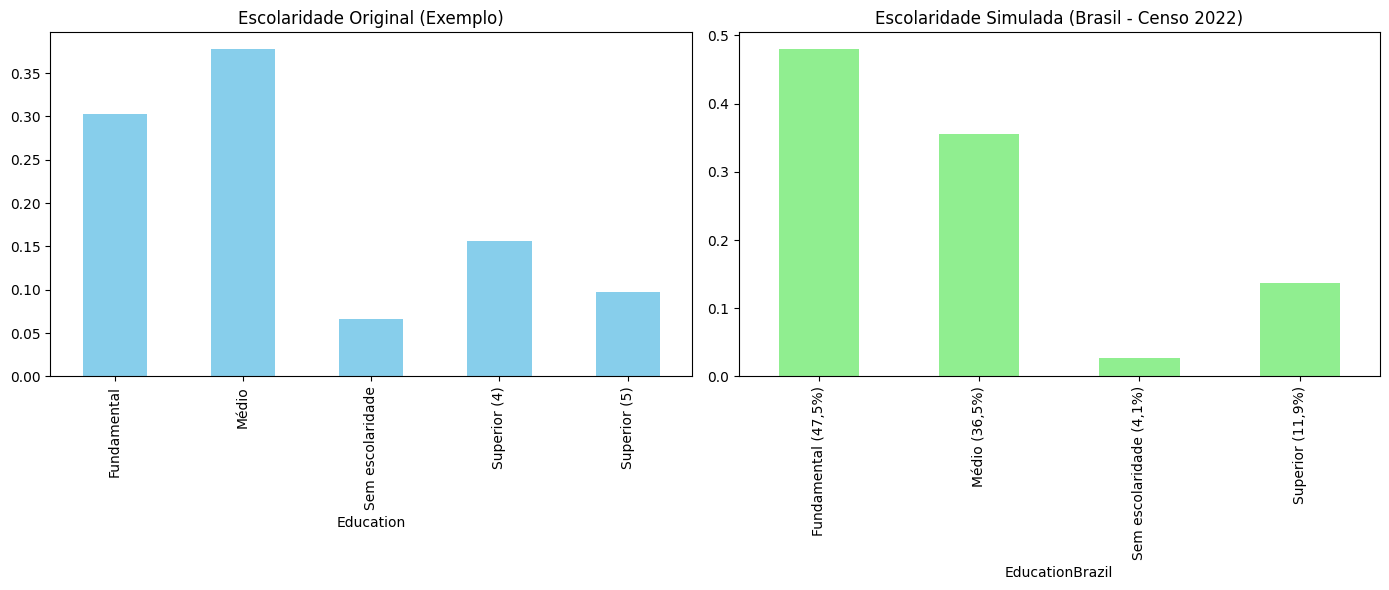

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criar DataFrame de exemplo (caso você já não tenha)
np.random.seed(42)  # Para reprodutibilidade
df = pd.DataFrame({
    'Education': np.random.choice([1, 2, 3, 4, 5], size=410, p=[0.05, 0.30, 0.40, 0.15, 0.10])
})

# Definir probabilidades conforme o Censo brasileiro
probabilities = {
    1: 0.041,   # Sem escolaridade
    2: 0.475,   # Fundamental
    3: 0.365,   # Médio
    4: 0.119    # Superior (agrupa 4 e 5)
}

# Mapear Education para categorias brasileiras
def map_to_brazil(edu):
    if edu in [4, 5]:
        edu = 4  # Agrupa ensino superior
    return edu

df['EducationMapped'] = df['Education'].apply(map_to_brazil)

# Gerar EducationBrazil com as probabilidades brasileiras
df['EducationBrazil'] = np.random.choice(
    [1, 2, 3, 4],
    size=410,
    p=list(probabilities.values())
)

# Ver distribuição
print("\nDistribuição original (Education):")
print(df['Education'].value_counts(normalize=True).sort_index())

print("\nDistribuição simulada do Brasil (EducationBrazil):")
print(df['EducationBrazil'].value_counts(normalize=True).sort_index())

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Distribuição Original
education_labels = {
    1: "Sem escolaridade",
    2: "Fundamental",
    3: "Médio",
    4: "Superior (4)",
    5: "Superior (5)"
}
df['Education'].map(education_labels).value_counts(normalize=True).sort_index().plot(
    kind='bar', ax=axes[0], color='skyblue', title='Escolaridade Original (Exemplo)'
)

# Gráfico 2: Distribuição Simulada (Brasil)
brazil_labels = {
    1: "Sem escolaridade (4,1%)",
    2: "Fundamental (47,5%)",
    3: "Médio (36,5%)",
    4: "Superior (11,9%)"
}
df['EducationBrazil'].map(brazil_labels).value_counts(normalize=True).sort_index().plot(
    kind='bar', ax=axes[1], color='lightgreen', title='Escolaridade Simulada (Brasil - Censo 2022)'
)

plt.tight_layout()
plt.show()